{'11': 1}


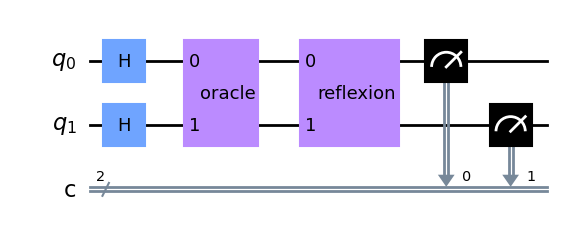

In [1]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_histogram

# Oracle du circuit de Grover
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)

"""Cette partie crée un circuit quantique appelé "oracle" pour l'algorithme de Grover. 
Il utilise une porte CZ (Controlled-Z) pour appliquer une phase de -1 aux états où les 
qubits 0 et 1 sont tous les deux en |1⟩."""


# Réflexion sur la moyenne
reflexion=QuantumCircuit(2, name='reflexion')
reflexion.h([0, 1])
reflexion.z([0, 1])
reflexion.cz(0, 1)
reflexion.h([0, 1])

"""Cette partie crée un autre circuit quantique appelé "réflexion"(ou le diffuseur) pour l'algorithme de Grover. 
Il applique les opérations suivantes :
1. Une porte Hadamard (H) pour mettre les qubits 0 et 1 dans un état superposé.
2. Une porte Z pour appliquer une phase de -1 à chaque état.
3. Une porte CZ (Controlled-Z) pour appliquer une phase de -1 aux états où les qubits 0 et 1 
sont tous les deux en |1⟩.
4. Une autre porte Hadamard (H) pour revenir à l'état d'origine."""


# Back-end de simulation
backend = Aer.get_backend('qasm_simulator')

"""Cette partie spécifie le backend (la machine sur laquelle le circuit quantique sera exécuté) 
en utilisant le simulateur QASM d'Aer."""

# Circuit de Grover
grover = QuantumCircuit(2, 2)
grover.h([0, 1])
grover.append(oracle, [0, 1])
grover.append(reflexion, [0, 1])
grover.measure([0, 1], [0, 1])

"""Cette partie crée le circuit de Grover lui-même avec 2 qubits et 2 bits classiques. 
Les opérations suivantes sont appliquées :
1. Une porte Hadamard (H) pour mettre les qubits 0 et 1 dans un état superposé.
2. L'ajout du circuit "oracle" créé précédemment en utilisant la fonction append.
3. L'ajout du circuit "réflexion" créé précédemment en utilisant la fonction append.
4. Une mesure des qubits 0 et 1 pour obtenir les résultats classiques correspondants."""

# Exécution du circuit
job = execute(grover, backend, shots=1)
result = job.result()
counts=result.get_counts()
print(counts)

"""Cette partie exécute le circuit de Grover en utilisant la fonction execute. 
Le résultat est ensuite récupéré à l'aide de la méthode result, et les résultats 
des mesures sont extraits à l'aide de la méthode get_counts. 
Ensuite, les résultats sont affichés à l'aide de la fonction print."""

# Affichage du circuit
grover.draw(output='mpl')